## Mozambican Portuguese



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
train = pd.read_csv('train.txt',sep='\t')
dev = pd.read_csv('dev.txt',sep='\t')
test = pd.read_csv('test.txt',sep='\t')

In [3]:
print(train.shape)
print(dev.shape)
print(test.shape)

(2144, 2)
(306, 2)
(613, 2)


In [4]:
train.head(10)

,text,label
0,"#MozambiqueWordExpo ♦️Um povo pecador, uma ger...",neutral
1,"@user De qualquer forma vai chorar, ou porque ...",negative
2,#WordExpoInAngola está mensagem requerer uma m...,neutral
3,@user Devo confessar que normalmente acho inte...,neutral
4,"Yeah é raro mas rendi, e me rendo com o novo á...",positive
5,@user Queres quanto pelo teu silêncio?,neutral
6,A pior coisa que um cristão faz nesta geração ...,negative
7,#MoçambiqueParaJeus Tiago Cap. 5 | NVI 20 lemb...,positive
8,Não leiam memes como se fossem texto narrativo...,neutral
9,@user Exacto...estão a criar uma nova clientel...,neutral


In [5]:
dev.head()

,text,label
0,@user Esses promotores vão nos matar e são cap...,negative
1,@user Esta criatura é inacreditável! Um horror...,negative
2,"Hummmm, ficou tão mal para ele. https://t.co/B...",neutral
3,@user @user Tv sucesso não consegui fechar com...,negative
4,Os pecados não são removidos pela sabedoria na...,neutral


In [6]:
test.head()

,text,label
0,Muito obrigado xai xai Gaza pelo carinho confi...,positive
1,Polícia sul-africana detém moçambicano por pos...,neutral
2,Bebé de um mês morre depois de ser “roubado” p...,negative
3,"@user @user Está frio moço, Esse fogo que está...",negative
4,"@user Esses eggs podem te deixar puto, 5 só",neutral


Check for missing values

In [7]:
train.isnull().any()


text     False
label    False
dtype: bool

In [8]:
dev.isnull().any()

text     False
label    False
dtype: bool

In [9]:

test.isnull().any()

text     False
label    False
dtype: bool

### Encode target labels using LabelEncoder
Here 0 is negative, 1 is neutral, 2 is positive

In [10]:
from sklearn.preprocessing import LabelEncoder
 
le = LabelEncoder()
_train = le.fit_transform(train['label'])

In [11]:
train['label_cat'] = _train
#train.head(20)

In [12]:
le = LabelEncoder()
_dev = le.fit_transform(dev['label'])

In [13]:
dev['label_cat'] = _dev

In [14]:
le = LabelEncoder()
_test = le.fit_transform(test['label'])

In [15]:
test['label_cat'] = _test

In [16]:
# checking out the negative comments from the train set

train[train['label_cat'] == 0].head(10)

,text,label,label_cat
1,"@user De qualquer forma vai chorar, ou porque ...",negative,0
6,A pior coisa que um cristão faz nesta geração ...,negative,0
13,@user @user @user @user Infelizmente essa gera...,negative,0
19,@user @user O barato saiu caro bro,negative,0
26,Vás te magoar bué https://t.co/D9OpXi1DG4,negative,0
30,"Vida de pobre é difícil, é difícil.",negative,0
52,@user Os Economistas do Banco de Moçambique e ...,negative,0
57,Caga lá para nós tio. Este povo já tem problem...,negative,0
62,O banco abre as 9h e elas estão a tirar foto p...,negative,0
63,@user Edjo... ainda n viste? Está a se falar d...,negative,0


In [17]:
# checking out the neutral comments from the train set

train[train['label_cat'] == 1].head(10)

,text,label,label_cat
0,"#MozambiqueWordExpo ♦️Um povo pecador, uma ger...",neutral,1
2,#WordExpoInAngola está mensagem requerer uma m...,neutral,1
3,@user Devo confessar que normalmente acho inte...,neutral,1
5,@user Queres quanto pelo teu silêncio?,neutral,1
8,Não leiam memes como se fossem texto narrativo...,neutral,1
9,@user Exacto...estão a criar uma nova clientel...,neutral,1
10,@user 😫😫😫Essa cena como é rija as vezes,neutral,1
11,"@user Não, Não. Isso é querer viver no comodis...",neutral,1
12,@user Brahh aquela mensagem é para ti.,neutral,1
15,Me lembro do 2021 como se fosse ontem😪,neutral,1


In [18]:
# checking out the postive comments from the train set 

train[train['label_cat'] == 2].head(10)

,text,label,label_cat
4,"Yeah é raro mas rendi, e me rendo com o novo á...",positive,2
7,#MoçambiqueParaJeus Tiago Cap. 5 | NVI 20 lemb...,positive,2
14,"Feliz 2022, com saúde e paz! O Diretor do CAE/...",positive,2
22,A palavra que eu tatuei no meu corpo tem efeit...,positive,2
23,@user Mas é bom assim. Pelo menos eu gosto ass...,positive,2
29,@user CRISTO ressuscitou dos mortos venceu a m...,positive,2
33,Juntos somos forte. Paz e amor. Tching90 😎 em ...,positive,2
35,@user De facto esse foi um grande milagre que ...,positive,2
45,Gajos do Barça a meter hype no Xavi... o Womi ...,positive,2
48,Tente não ser tão individualista só tens a per...,positive,2


#### Downsampling Majority class to make the classes balanced

In [19]:

from sklearn.utils import resample

df_majority = train[train['label_cat'] == 1]

df_minority = train[(train['label_cat'] == 0) | (train['label_cat'] == 2)]

# Downsample  majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,     # sample with replacement
                                 n_samples=500,    # to match minority class
                                 random_state=42) # reproducible results

# Combine both class
df_downsampled = pd.concat([df_minority, df_majority_downsampled])

# Display new class counts
df_downsampled.label.value_counts()

negative    545
neutral     500
positive    478
Name: label, dtype: int64

#### Plot of classes - imbalanced classes

Text(0, 0.5, 'Frequency')

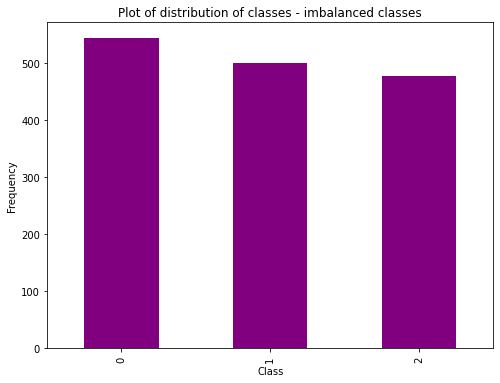

In [141]:
im=train['label_cat'].value_counts().plot.bar(color = 'purple', figsize = (8,6),title='Plot of distribution of classes - imbalanced classes')
im.set_xlabel("Class")
im.set_ylabel("Frequency")

#### Plot of classes - After downsampling majority class

Text(0, 0.5, 'Frequency')

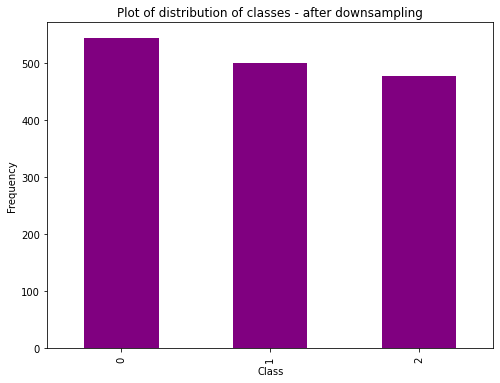

In [140]:
ds = df_downsampled['label_cat'].value_counts().plot.bar(color = 'purple', figsize = (8,6), title='Plot of distribution of classes - after downsampling')
ds.set_xlabel("Class")
ds.set_ylabel("Frequency")

In [29]:
train = df_downsampled
train = train.reindex()

In [30]:
train = train.reset_index(drop=True)

In [31]:
train

,text,label,label_cat
0,"@user De qualquer forma vai chorar, ou porque ...",negative,0
1,"Yeah é raro mas rendi, e me rendo com o novo á...",positive,2
2,A pior coisa que um cristão faz nesta geração ...,negative,0
3,#MoçambiqueParaJeus Tiago Cap. 5 | NVI 20 lemb...,positive,2
4,@user @user @user @user Infelizmente essa gera...,negative,0
...,...,...,...
1518,"O púlpito não é seu como Pastor, ELE pertence ...",neutral,1
1519,"#MozambiqueWordExpo ♦️Um povo pecador, uma ger...",neutral,1
1520,Briga de casal no máximo deve durar 3 dias,neutral,1
1521,Detido director provincial das finanças de Tet...,neutral,1


In [32]:
print(train.shape)
print(dev.shape)
print(test.shape)

(1523, 3)
(306, 3)
(613, 3)


Text(0.5, 0, 'String Length')

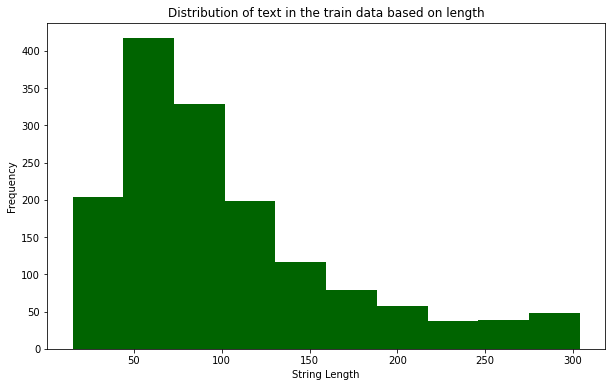

In [138]:
# checking the distribution of text in the train data based on length

length_train = train['text'].str.len().plot.hist(color = 'darkgreen', figsize = (10, 6), title='Distribution of text in the train data based on length')
length_train.set_xlabel("String Length")

Text(0.5, 0, 'String Length')

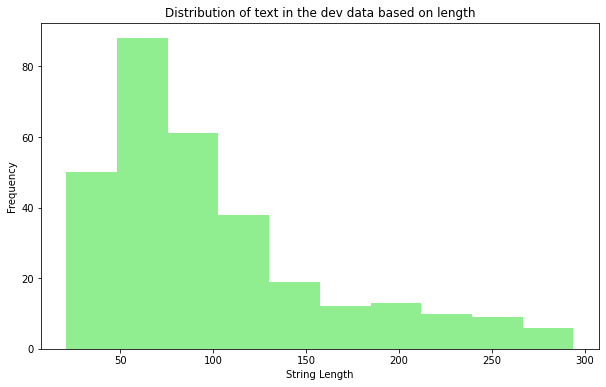

In [137]:
# checking the distribution of text in the dev data based on length
length_dev = dev['text'].str.len().plot.hist(color = 'lightgreen', figsize = (10, 6), title='Distribution of text in the dev data based on length')
length_dev.set_xlabel("String Length")

Text(0.5, 0, 'String Length')

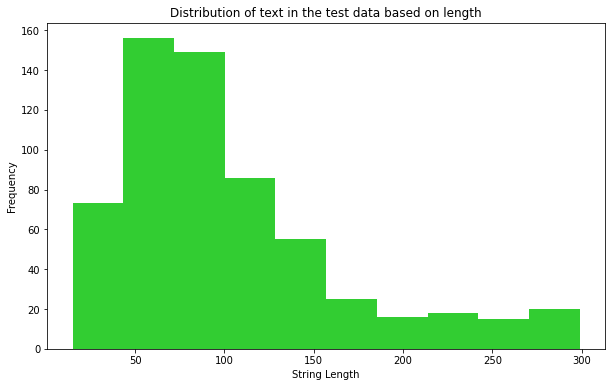

In [136]:
# checking the distribution of text in the test data based on length
length_test = test['text'].str.len().plot.hist(color = 'limegreen', figsize = (10,6), title='Distribution of text in the test data based on length')
length_test.set_xlabel("String Length")

In [40]:
# adding a column to represent the length of the text

train['len'] = train['text'].str.len()
dev['len'] = dev['text'].str.len()
test['len'] = test['text'].str.len()

train.head(10)

,text,label,label_cat,len
0,"@user De qualquer forma vai chorar, ou porque ...",negative,0,77
1,"Yeah é raro mas rendi, e me rendo com o novo á...",positive,2,63
2,A pior coisa que um cristão faz nesta geração ...,negative,0,189
3,#MoçambiqueParaJeus Tiago Cap. 5 | NVI 20 lemb...,positive,2,183
4,@user @user @user @user Infelizmente essa gera...,negative,0,108
5,"Feliz 2022, com saúde e paz! O Diretor do CAE/...",positive,2,299
6,@user @user O barato saiu caro bro,negative,0,34
7,A palavra que eu tatuei no meu corpo tem efeit...,positive,2,88
8,@user Mas é bom assim. Pelo menos eu gosto ass...,positive,2,51
9,Vás te magoar bué https://t.co/D9OpXi1DG4,negative,0,41


In [41]:
dev.head(5)

,text,label,label_cat,len
0,@user Esses promotores vão nos matar e são cap...,negative,0,81
1,@user Esta criatura é inacreditável! Um horror...,negative,0,134
2,"Hummmm, ficou tão mal para ele. https://t.co/B...",neutral,1,55
3,@user @user Tv sucesso não consegui fechar com...,negative,0,50
4,Os pecados não são removidos pela sabedoria na...,neutral,1,173


In [42]:
train.groupby('label_cat').describe()

len                                                         
           count        mean        std   min    25%   50%     75%    max
label_cat                                                                
0          545.0  104.605505  67.335232  15.0  59.00  84.0  127.00  304.0
1          500.0  101.194000  64.786905  15.0  51.75  85.0  129.25  303.0
2          478.0  103.096234  63.325448  18.0  57.25  82.5  135.00  302.0

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 30')

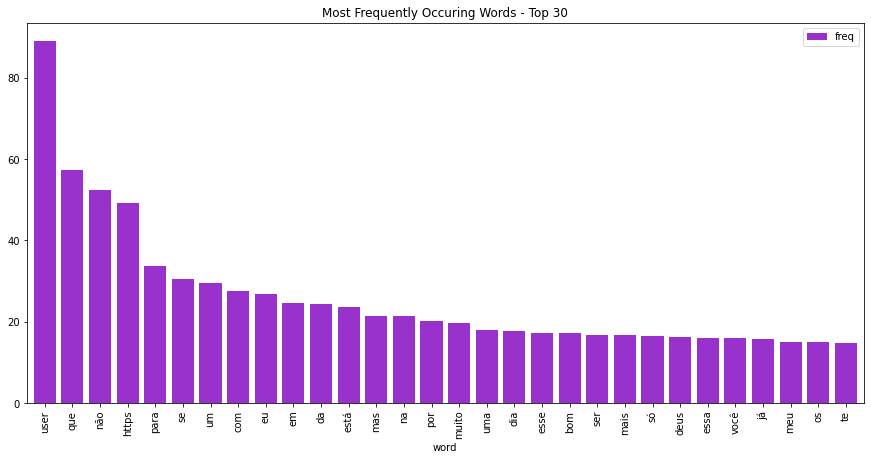

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words = 'english')
words = vectorizer.fit_transform(train.text)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in vectorizer.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'darkorchid',width=0.8)
plt.title("Most Frequently Occuring Words - Top 30")

Text(0.5, 1.0, 'WordCloud - Vocabulary from Text')

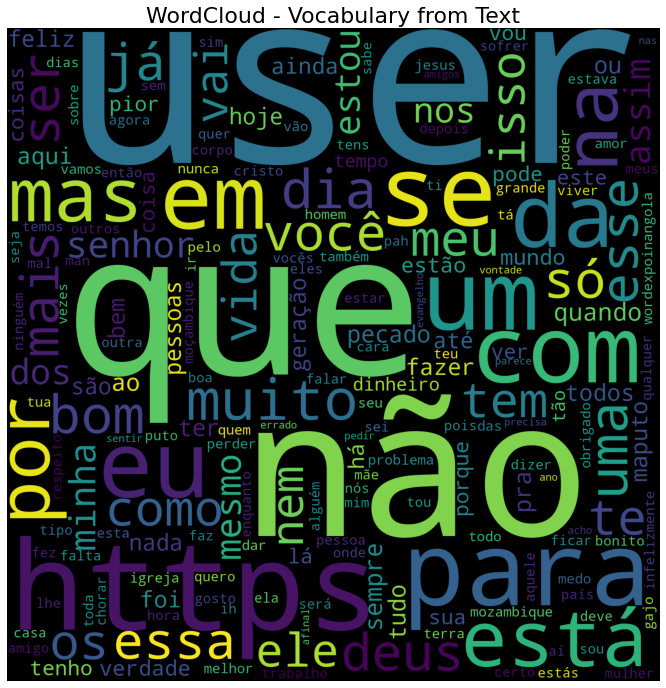

In [47]:
from wordcloud import WordCloud

wordcloud = WordCloud(width = 1500, height = 1500).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(12,12))
plt.imshow(wordcloud)
plt.axis('off')
plt.title("WordCloud - Vocabulary from Text", fontsize = 22)


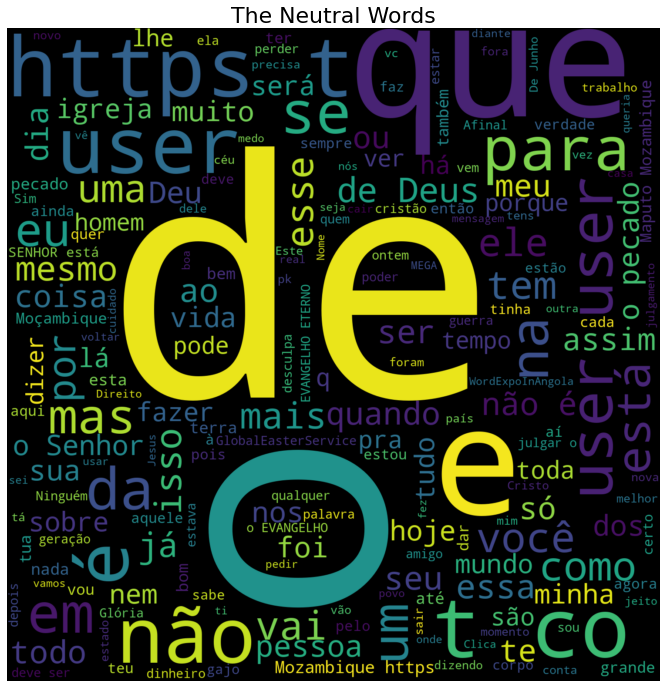

In [48]:
neutral_words =' '.join([text for text in train['text'][train['label_cat'] == 1]])

wordcloud = WordCloud( width = 1500, height = 1500, random_state = 0).generate(neutral_words)
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Neutral Words', fontsize = 22)
plt.show()

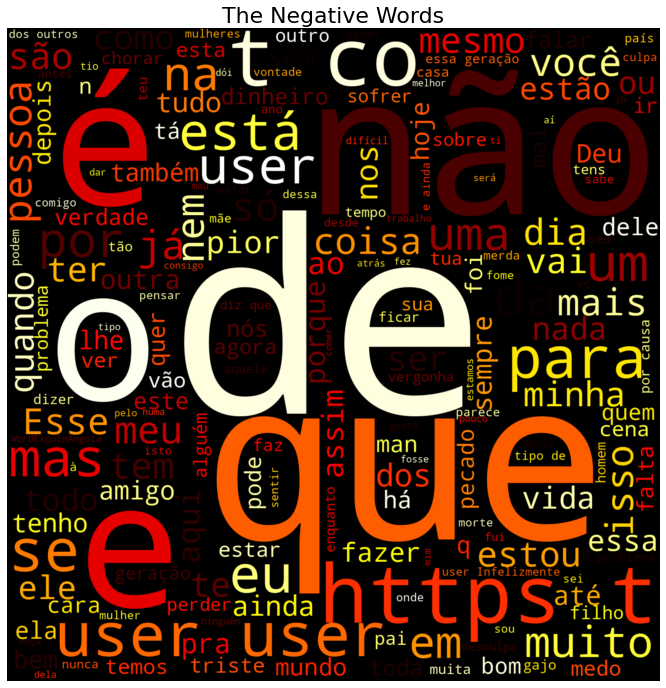

In [49]:
negative_words =' '.join([text for text in train['text'][train['label_cat'] == 0]])

wordcloud = WordCloud(width=1500, height=1500, random_state = 0, colormap = 'hot',background_color ='black').generate(negative_words)
plt.figure(figsize=(12, 12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Negative Words',fontsize = 22)
plt.show()


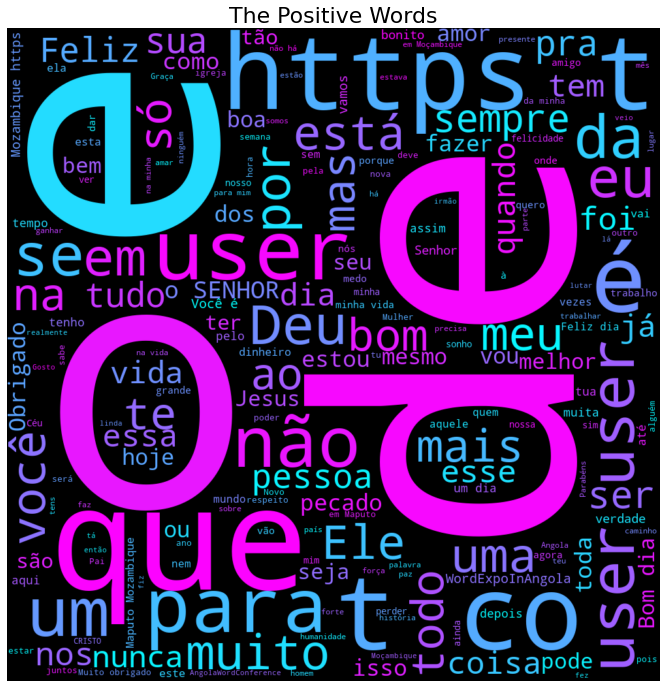

In [50]:
positive_words =' '.join([text for text in train['text'][train['label_cat'] == 2]])

wordcloud = WordCloud(background_color = 'black', width=1000, height=1000, random_state = 0, colormap='cool').generate(positive_words)
plt.figure(figsize=(12, 12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Positive Words',fontsize = 22)
plt.show()

In [51]:
# collecting the hashtags

def hashtag_extract(x):
    hashtags = []
    
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [52]:
import re

# extracting hashtags from negative texts
HT_negative = hashtag_extract(train['text'][train['label_cat'] == 0])

# extracting hashtags from neutral textts
HT_neutral = hashtag_extract(train['text'][train['label_cat'] == 1])

# extracting hashtags from positive textts
HT_positive = hashtag_extract(train['text'][train['label_cat'] == 2])

# unnesting all the list
HT_neutral = sum(HT_neutral,[])
HT_negative = sum(HT_negative,[])
HT_positive = sum(HT_positive,[])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


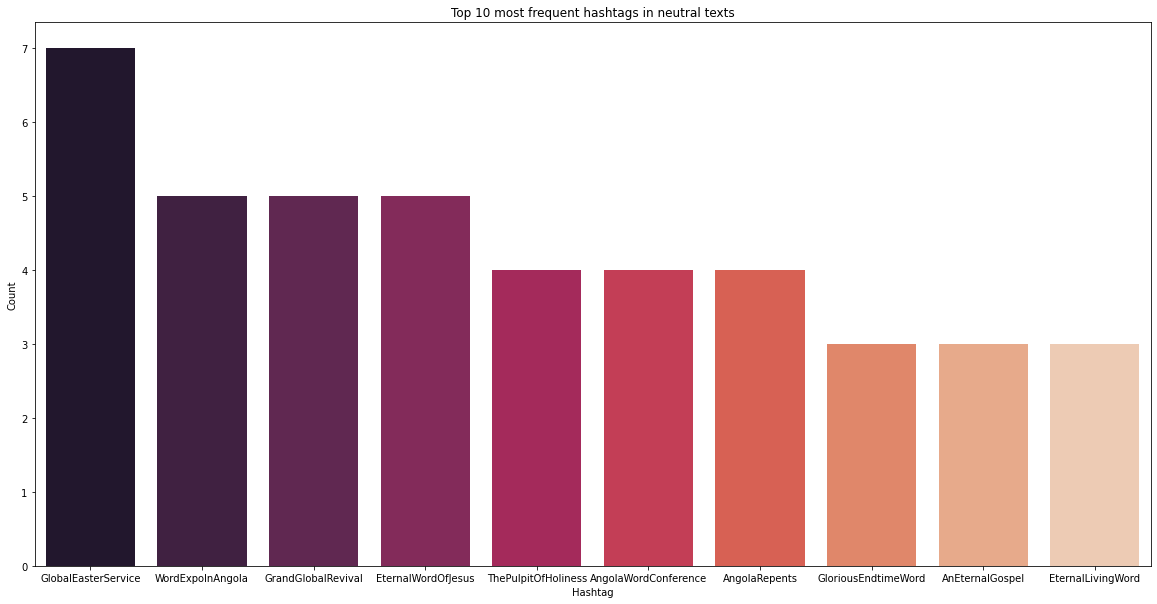

In [55]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

a = nltk.FreqDist(HT_neutral)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 10 most frequent hashtags in neutral texts    
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(20,10))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count", palette = 'rocket')
ax.set(ylabel = 'Count', title ='Top 10 most frequent hashtags in neutral texts' )
plt.show()

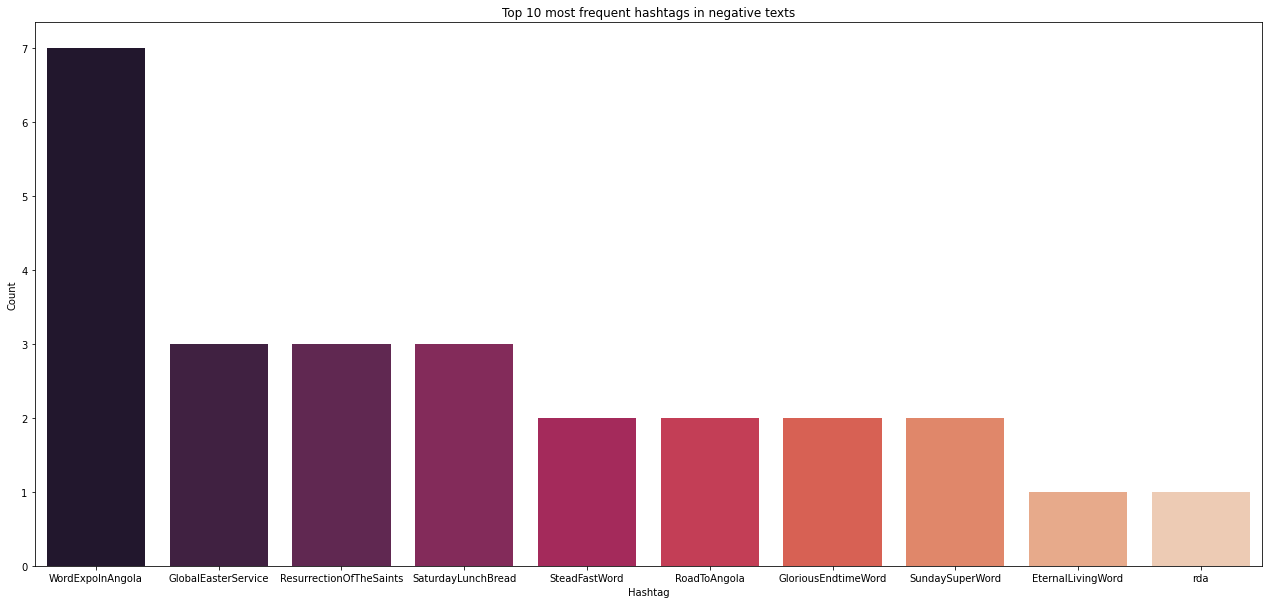

In [56]:
a = nltk.FreqDist(HT_negative)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 10 most frequent hashtags in negative texts     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(22,10))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count",palette = 'rocket')
ax.set(ylabel = 'Count',title ='Top 10 most frequent hashtags in negative texts')
plt.show()

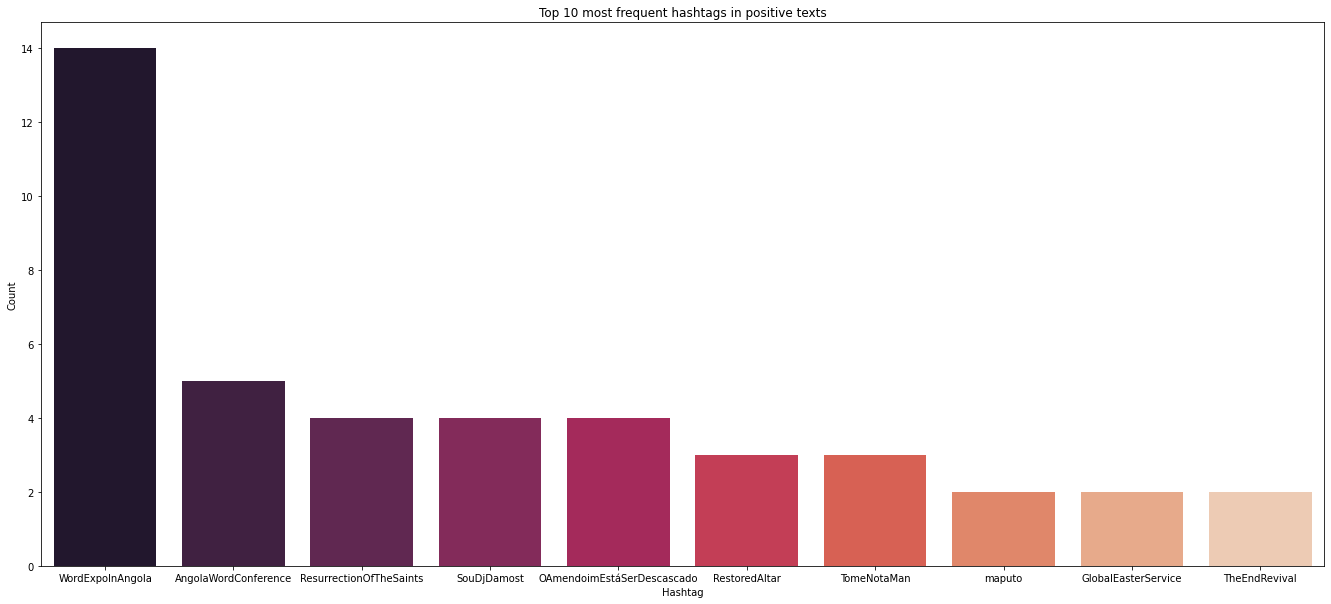

In [59]:
a = nltk.FreqDist(HT_positive)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 10 most frequent hashtags in positive texts    
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(23,10))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count", palette = 'rocket')
ax.set(ylabel = 'Count', title ='Top 10 most frequent hashtags in positive texts')
plt.show()

Now we shall remove unwanted patterns from the data

In [60]:
# removing unwanted patterns from the data

import re
import nltk

nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [61]:
#train.shape

In [62]:
#dev.shape

In [63]:
#test.shape

In [64]:
train_corpus = []

for i in range(0, 1523):
  review = re.sub("@[A-Za-z0-9_]+","", train['text'][i])
  review = re.sub("#[A-Za-z0-9_]+","", review)
  review = review.lower()
  review = review.split()
  
  ps = PorterStemmer()
  
  # stemming
  review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
  
  # joining them back with space
  review = ' '.join(review)
  train_corpus.append(review)

In [65]:
#train_corpus[:10]

In [66]:
dev_corpus = []

for i in range(0, 306):
  review = re.sub("@[A-Za-z0-9_]+","", dev['text'][i])
  review = re.sub("#[A-Za-z0-9_]+","", review)
  review = review.lower()
  review = review.split()
  
  ps = PorterStemmer()
  
  # stemming
  review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
  
  # joining them back with space
  review = ' '.join(review)
  dev_corpus.append(review)

In [67]:
#dev_corpus[:10]

In [68]:
test_corpus = []

for i in range(0,613):
  review = re.sub("@[A-Za-z0-9_]+","",test['text'][i])
  review = re.sub("#[A-Za-z0-9_]+","", review)
  review = review.lower()
  review = review.split()
  
  ps = PorterStemmer()
  
  # stemming
  review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
  
  # joining them back with space
  review = ' '.join(review)
  test_corpus.append(review)

In [69]:
#test_corpus[:10]

In [70]:
#train.head()

Using TF IDF vectorizer, we will now convert text data to numeric form

In [71]:
from sklearn.feature_extraction.text import TfidfVectorizer

#Select top 500 features
vectorizer = TfidfVectorizer(max_features = 500)
x = vectorizer.fit_transform(train_corpus).toarray()
y = train.iloc[:, 2]

print(x.shape)
print(y.shape)

(1523, 500)
(1523,)


In [72]:
#dev.head()

In [73]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features = 500)
x_dev = vectorizer.fit_transform(dev_corpus).toarray()
y_dev = dev.iloc[:, 2]
print(x_dev.shape)

(306, 500)


In [74]:
#test.head()

In [75]:
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features = 500)
x_test = vectorizer.fit_transform(test_corpus).toarray()
y_test = test.iloc[:, 2]

print(x_test.shape)

(613, 500)


Standarizing the data

In [76]:
# standardization

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x)
x_dev = sc.transform(x_dev)
x_test = sc.transform(x_test)

#### Random Forest

In [103]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

model = RandomForestClassifier(n_estimators=5)
model.fit(x_train, y)

y_pred_dev = model.predict(x_dev)
y_pred_test = model.predict(x_test)

In [104]:
print("Training Accuracy :", model.score(x_train, y))
print("Validation Accuracy :", model.score(x_dev, y_dev))
print("Test Accuracy :", model.score(x_test, y_test))


Training Accuracy : 0.9264609323703218
Validation Accuracy : 0.3627450980392157
Test Accuracy : 0.36541598694942906


In [105]:
# calculating the f1 score for the dev set
print("F1 score for dev :", f1_score(y_dev, y_pred_dev,average='macro'))

# confusion matrix
cm_dev = confusion_matrix(y_dev, y_pred_dev)
print(cm_dev)

F1 score for dev : 0.3292788697241164
[[37 31 25]
 [51 63 45]
 [19 24 11]]


In [106]:
# calculating the f1 score for the test set
print("F1 score for test :", f1_score(y_test, y_pred_test,average='macro'))


# confusion matrix
cm_test = confusion_matrix(y_test, y_pred_test)
print(cm_test)

F1 score for test : 0.3418333049865961
[[ 70  53  21]
 [131 122  67]
 [ 63  54  32]]


In [107]:
print(classification_report(y_dev, y_pred_dev, labels=[0, 1, 2]))

              precision    recall  f1-score   support

           0       0.35      0.40      0.37        93
           1       0.53      0.40      0.45       159
           2       0.14      0.20      0.16        54

    accuracy                           0.36       306
   macro avg       0.34      0.33      0.33       306
weighted avg       0.41      0.36      0.38       306



In [108]:
print(classification_report(y_test, y_pred_test, labels=[0, 1, 2]))

              precision    recall  f1-score   support

           0       0.27      0.49      0.34       144
           1       0.53      0.38      0.44       320
           2       0.27      0.21      0.24       149

    accuracy                           0.37       613
   macro avg       0.35      0.36      0.34       613
weighted avg       0.41      0.37      0.37       613



#### XGBoost

In [115]:
from xgboost import XGBClassifier

model = XGBClassifier()

model.fit(x_train, y)

y_pred_dev = model.predict(x_dev)
y_pred_test = model.predict(x_test)


In [116]:
print("Training Accuracy :", model.score(x_train, y))
print("Validation Accuracy :", model.score(x_dev, y_dev))
print("Test Accuracy :", model.score(x_test, y_test))


Training Accuracy : 0.7058437294812869
Validation Accuracy : 0.3758169934640523
Test Accuracy : 0.36541598694942906


In [117]:
# calculating the f1 score for the dev set
print("F1 score for dev :", f1_score(y_dev, y_pred_dev,average='macro'))

# confusion matrix
cm_dev = confusion_matrix(y_dev, y_pred_dev)
print(cm_dev)

F1 score for dev : 0.2957908847155145
[[28 47 18]
 [58 83 18]
 [22 28  4]]


In [118]:
# calculating the f1 score for the test set
print("F1 score for test :", f1_score(y_test, y_pred_test,average='macro'))


# confusion matrix
cm_test = confusion_matrix(y_test, y_pred_test)
print(cm_test)

F1 score for test : 0.3342647811812897
[[ 83  47  14]
 [171 118  31]
 [ 67  59  23]]


In [119]:
#Classification report for Dev
print(classification_report(y_dev, y_pred_dev, labels=[0, 1, 2]))

              precision    recall  f1-score   support

           0       0.26      0.30      0.28        93
           1       0.53      0.52      0.52       159
           2       0.10      0.07      0.09        54

    accuracy                           0.38       306
   macro avg       0.29      0.30      0.30       306
weighted avg       0.37      0.38      0.37       306



In [120]:
#Classification report for Test
print(classification_report(y_test, y_pred_test, labels=[0, 1, 2]))

              precision    recall  f1-score   support

           0       0.26      0.58      0.36       144
           1       0.53      0.37      0.43       320
           2       0.34      0.15      0.21       149

    accuracy                           0.37       613
   macro avg       0.37      0.37      0.33       613
weighted avg       0.42      0.37      0.36       613



#### SVC- Support Vector Classification

In [121]:
from sklearn.svm import SVC

model = SVC()
model.fit(x_train, y)
y_pred_dev = model.predict(x_dev)
y_pred_test = model.predict(x_test)

In [122]:
print("Training Accuracy :", model.score(x_train, y))
print("Validation Accuracy :", model.score(x_dev, y_dev))
print("Test Accuracy :", model.score(x_test, y_test))


Training Accuracy : 0.9100459619172685
Validation Accuracy : 0.27450980392156865
Test Accuracy : 0.2936378466557912


In [123]:
# calculating the f1 score for the dev set
print("F1 score for dev :", f1_score(y_dev, y_pred_dev,average='macro'))

# confusion matrix
cm_dev = confusion_matrix(y_dev, y_pred_dev)
print(cm_dev)

F1 score for dev : 0.24078393664579792
[[ 52  20  21]
 [110  25  24]
 [ 34  13   7]]


In [124]:
# calculating the f1 score for the test set
print("F1 score for test :", f1_score(y_test, y_pred_test,average='macro'))


# confusion matrix
cm_test = confusion_matrix(y_test, y_pred_test)
print(cm_test)

F1 score for test : 0.281422814958097
[[ 91  28  25]
 [213  60  47]
 [ 89  31  29]]


Choose the best hyperparameters for SVC

In [125]:
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1,0.5, 1,5], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(x_train, y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.357 total time=   0.6s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.357 total time=   0.6s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.357 total time=   0.6s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.359 total time=   0.6s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.359 total time=   0.6s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.357 total time=   0.6s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.357 total time=   0.6s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.357 total time=   0.5s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.359 total time=   0.6s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.359 total time=   0.6s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.357 total time=   0.6s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 0.5, 1, 5],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [126]:
# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 5, 'gamma': 0.0001, 'kernel': 'rbf'}
SVC(C=5, gamma=0.0001)


The best parameters after hyper-parameter tuning are 
C = 5, gamma = 0.0001, kernel = rbf

In [127]:
grid_predictions_dev = grid.predict(x_dev)
  
# print classification report
print(classification_report(y_dev, grid_predictions_dev))

              precision    recall  f1-score   support

           0       0.24      0.41      0.31        93
           1       0.48      0.26      0.33       159
           2       0.14      0.17      0.15        54

    accuracy                           0.29       306
   macro avg       0.29      0.28      0.26       306
weighted avg       0.35      0.29      0.29       306



In [128]:
grid_predictions_test = grid.predict(x_test)
  
# print classification report
print(classification_report(y_test, grid_predictions_test))

              precision    recall  f1-score   support

           0       0.24      0.53      0.33       144
           1       0.48      0.24      0.32       320
           2       0.27      0.24      0.26       149

    accuracy                           0.31       613
   macro avg       0.33      0.34      0.30       613
weighted avg       0.37      0.31      0.31       613



#### Multinomial Logistic Regression

In [129]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(multi_class='multinomial')

model.fit(x_train, y)

y_pred_dev = model.predict(x_dev)
y_pred_test = model.predict(x_test)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [130]:
print("Training Accuracy :", model.score(x_train, y))
print("Validation Accuracy :", model.score(x_dev, y_dev))
print("Test Accuracy :", model.score(x_test, y_test))


Training Accuracy : 0.8509520682862771
Validation Accuracy : 0.3104575163398693
Test Accuracy : 0.3474714518760196


In [131]:
# calculating the f1 score for the dev set
print("F1 score for dev :", f1_score(y_dev, y_pred_dev,average='macro'))

# confusion matrix
cm_dev = confusion_matrix(y_dev, y_pred_dev)
print(cm_dev)

F1 score for dev : 0.2983325906120024
[[25 29 39]
 [57 50 52]
 [17 17 20]]


In [132]:
# calculating the f1 score for the test set
print("F1 score for test :", f1_score(y_test, y_pred_test,average='macro'))


# confusion matrix
cm_test = confusion_matrix(y_test, y_pred_test)
print(cm_test)

F1 score for test : 0.34273971204257614
[[ 61  38  45]
 [103  97 120]
 [ 47  47  55]]


In [133]:
#Classification report for Dev
print(classification_report(y_dev, y_pred_dev, labels=[0, 1, 2]))

              precision    recall  f1-score   support

           0       0.25      0.27      0.26        93
           1       0.52      0.31      0.39       159
           2       0.18      0.37      0.24        54

    accuracy                           0.31       306
   macro avg       0.32      0.32      0.30       306
weighted avg       0.38      0.31      0.33       306



In [134]:
#Classification report for Test
print(classification_report(y_test, y_pred_test, labels=[0, 1, 2]))

              precision    recall  f1-score   support

           0       0.29      0.42      0.34       144
           1       0.53      0.30      0.39       320
           2       0.25      0.37      0.30       149

    accuracy                           0.35       613
   macro avg       0.36      0.37      0.34       613
weighted avg       0.41      0.35      0.35       613

